Pierwsza część kodu dotycząca oczyszczeniu danych znajduje się w pliku _1_EDA.ipynb_, w którym zostały obrobione dane do budowy modelu klasyfukacji binarnej. Dane są do pobrania z https://www.kaggle.com/c/tabular-playground-series-mar-2021/data

In [6]:
# https://rukshanpramoditha.medium.com/unlock-the-power-of-xgboost-738536b9f36f
# Teraz korzystamy z przygotowanych wcześniej danych, które wczytujemy odpowiednio do tabeli charakterystyk X oraz do tabeli
# ze zmienną celu y.

import pandas as pd
import numpy as np
import os 

data_path = "E:\page_ds\XGBoost_step_by_step"
X = pd.read_csv(os.path.join(data_path, "x_train.csv"))
y = pd.read_csv(os.path.join(data_path, "y_train.csv"))


In [8]:
print(X.shape)
print(y.shape)
print(X.info())
print(y.info())


(300000, 68)
(300000, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 68 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cont0               300000 non-null  float64
 1   cont1               300000 non-null  float64
 2   cont2               300000 non-null  float64
 3   cont3               300000 non-null  float64
 4   cont4               300000 non-null  float64
 5   cont5               300000 non-null  float64
 6   cont6               300000 non-null  float64
 7   cont7               300000 non-null  float64
 8   cont8               300000 non-null  float64
 9   cont9               300000 non-null  float64
 10  cont10              300000 non-null  float64
 11  cat0                300000 non-null  int64  
 12  cat1                300000 non-null  int64  
 13  cat2                300000 non-null  int64  
 14  cat3                300000 non-null  int64  
 15  cat4     

Accuracy:  0.846

ROC Curve

Confusion Matrix


E:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
E:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


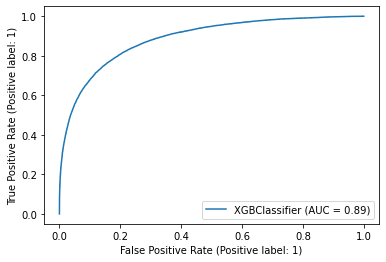

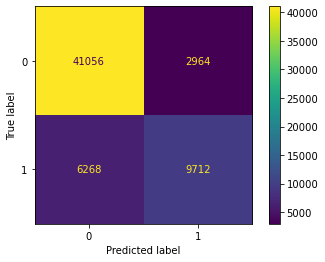

In [17]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score # dane są nisko niezbalansowane przez co powinniśmy rozpatrzyć losowanie warstwowe
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc

# dzielimy nasz zbiór na treningowy oraz testowy. Poza tym pamiętajmy, że mamy do dyspozycji zbiór walidacyjny około 200k rekordów
# ponieważ wybór proporcji próbki na uczącą i walidacyjną może wpłynąć na jakość modelu, powinniśmy rozważyć wrzucenie tego 
# parametru jako elementu optymalizacji hiperparametrów

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=128262)

# inicjalizujemy model 

xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=100,
                            objective='binary:logistic', booster='gbtree',
                            n_jobs=2, random_state=1)

# uczymy model, korzystamy z API sklearn
xgb_clf.fit(X_train, y_train)

# przeliczamy skoringi na zbiorze testowym aby sprawdzić jakość modelu w rozumieniu interesujących mnie miar

y_hat = xgb_clf.predict(X_test)

print("Accuracy: ", np.round(accuracy_score(y_test, y_hat), 3))
print("\nROC Curve")
print(plot_roc_curve(xgb_clf, X_test, y_test))
print("wartość parametru Gini dla tego modelu to:", 2*0.89-1) # Gini = 2*AUC-1
print("\nConfusion Matrix")
print(plot_confusion_matrix(xgb_clf, X_test, y_test))
plt.show()

In [24]:
print("wartość parametru Gini dla tego modelu to:", 2*0.89-1)



wartość parametru Gini dla tego modelu to: 0.78
